here's some code to do the wavelet decomposition of the MNIST data

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pywt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')
import seaborn as sns
sns.set()

load the data and the labels

In [2]:
mnist_R_img = np.load("train_images.npy").reshape(60000, 28, 28)
mnist_E_img = np.load("test_images.npy").reshape(10000, 28, 28)

In [3]:
mnist_R_lab = np.load("train_labels.npy")
mnist_E_lab = np.load("test_labels.npy")

do the wavelet decomposition of the images

In [4]:
mnist_R_wd = [pywt.wavedec2(x, 'db1') for x in mnist_R_img]
mnist_E_wd = [pywt.wavedec2(x, 'db1') for x in mnist_E_img]

look at the first five images

0 [5.]


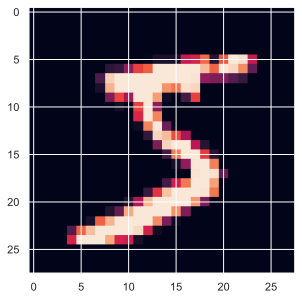

1 [0.]


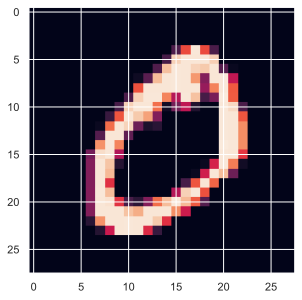

2 [4.]


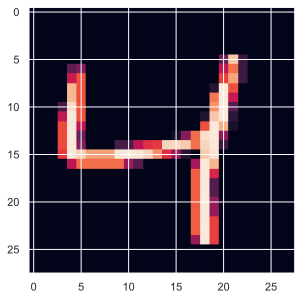

3 [1.]


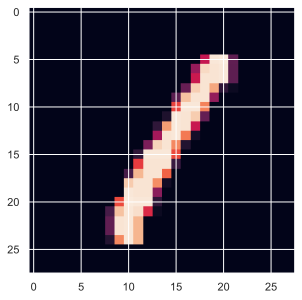

4 [9.]


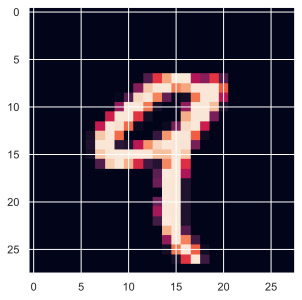

In [5]:
for i, a in enumerate(zip(mnist_R_img[:5], mnist_R_lab[:5])):
    print(i, a[1])
    plt.imshow(a[0])
    plt.show()

look at the finest (in pywt's convention, highest) levels of the wavelet decomposition

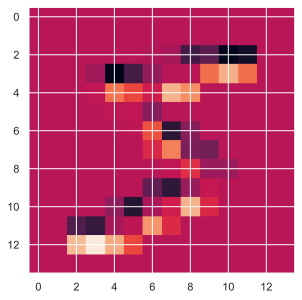

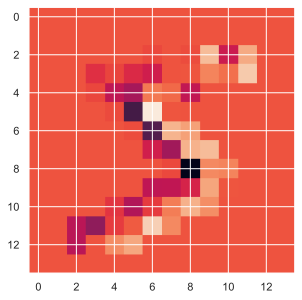

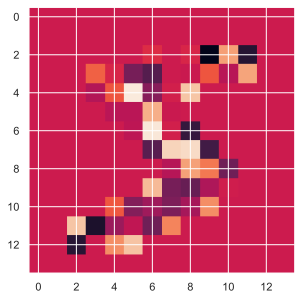

In [6]:
plt.imshow(mnist_R_wd[0][-1][0])
plt.show()
plt.imshow(mnist_R_wd[0][-1][1])
plt.show()
plt.imshow(mnist_R_wd[0][-1][2])
plt.show()

just to be explicit, here are the shapes of the levels of the decomposition:

In [48]:
totsize = 0
for i, x in enumerate(mnist_R_wd[0]):
    xs = [str(s) for s in np.array(x).shape]
    print("level "+str(i)+": shape [", end='')
    levsize = 1
    for j, s in enumerate(xs):
        levsize*=int(s)
        if j<len(xs)-1:
            print(s, end='x')
        else:
            print(s, end=']\n')
    totsize += levsize
    print("\t", str(levsize), "pixels on this level")
print("in total:", str(totsize), "pixels, compared to", str(28*28), "in the original")

level 0: shape [2x2]
	 4 pixels on this level
level 1: shape [3x2x2]
	 12 pixels on this level
level 2: shape [3x4x4]
	 48 pixels on this level
level 3: shape [3x7x7]
	 147 pixels on this level
level 4: shape [3x14x14]
	 588 pixels on this level
in total: 799 pixels, compared to 784 in the original


one thought I'm having now is that it might not make sense to go all the way to the coarsest levels, since there's no way to get information about 10 different options from 2x2 image (with only 4 bits of information), so we could in principle partially reconstruct the image up to the 4x4 scale -- but for a first pass, we can just keep things as they are (and in the worst case just throw those away or make those MLPs trivial)

but the idea is: we have four 4->10 MLPs, three 16->10 MLPs, three 49->10 MLPs, and three 196->10 MLPs, so we train thirteen MLPs in parallel and we somehow combine those scores (through averaging, voting, random forest, etc.)